# EJERCICIOS APRENDIZAJE AUTOMÁTICO

In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## REGLAS DE ASOCIACIÓN

En el “groceries.csv” contiene las transacciones recogidas durante un mes en una tienda de
comestibles. En cada una de las filas de este archivo se encuentran los artículos comprados de
forma conjunta por los diferentes clientes. Obtener las lista de artículos que tiene un soporte
mínimo de 0,15. Obtener también las reglas de asociación que se pueden deducir de este
conjunto de datos con un soporte mínimo de 0,05 y confianza de 0,25.

In [79]:
import csv

groceries = []
groceries_file = csv.reader(open("groceries.csv", "rb"))

for row in groceries_file:
    groceries.append(row)

In [80]:
groceries

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

Como el algoritmo Apriori no está implementado en scikit-learn, vamos a usar la implementación de Everaldo Aguiar & Reid Johnson:
http://nbviewer.ipython.org/github/cse40647/cse40647/blob/sp.14/10%20-%20Apriori.ipynb

In [81]:
import apriori

### Obtener la lista de artículos que tiene un soporte mínimo de 0,15

In [82]:
F, soporte = apriori.apriori(groceries, min_support=0.15, verbose=True)

{soda}:  sup = 0.174
{whole milk}:  sup = 0.256
{other vegetables}:  sup = 0.193
{rolls/buns}:  sup = 0.184


Sólo hay cuatro artículos con un soporte igual o mayor a 0.15: soda, whole milk, other vegetables y rolls/buns. No hay ningún conjunto de artículos que alcance este soporte mínimo.

### Obtener también las reglas de asociación que se pueden deducir de este conjunto de datos con un soporte mínimo de 0,05 y confianza de 0,25.

In [83]:
F2, soporte2 = apriori.apriori(groceries, min_support = 0.05, verbose = True)

{citrus fruit}:  sup = 0.083
{curd}:  sup = 0.053
{root vegetables}:  sup = 0.109
{shopping bags}:  sup = 0.099
{bottled beer}:  sup = 0.081
{butter}:  sup = 0.055
{newspapers}:  sup = 0.08
{napkins}:  sup = 0.052
{pip fruit}:  sup = 0.076
{domestic eggs}:  sup = 0.063
{bottled water}:  sup = 0.111
{tropical fruit}:  sup = 0.105
{soda}:  sup = 0.174
{whole milk}:  sup = 0.256
{other vegetables}:  sup = 0.193
{canned beer}:  sup = 0.078
{frankfurter}:  sup = 0.059
{sausage}:  sup = 0.094
{yogurt}:  sup = 0.14
{pastry}:  sup = 0.089
{margarine}:  sup = 0.059
{coffee}:  sup = 0.058
{brown bread}:  sup = 0.065
{fruit/vegetable juice}:  sup = 0.072
{whipped/sour cream}:  sup = 0.072
{pork}:  sup = 0.058
{rolls/buns}:  sup = 0.184
{beef}:  sup = 0.052
{whole milk, yogurt}:  sup = 0.056
{whole milk, rolls/buns}:  sup = 0.057
{whole milk, other vegetables}:  sup = 0.075


Al bajar el soporte mínimo, vemos que aparecen ya conjuntos de artículos en la lista.

In [84]:
H2 = apriori.generate_rules(F2, soporte2, min_confidence=0.25, verbose=True)

{yogurt} ---> {whole milk}:  conf = 0.402, sup = 0.056
{rolls/buns} ---> {whole milk}:  conf = 0.308, sup = 0.057
{other vegetables} ---> {whole milk}:  conf = 0.387, sup = 0.075
{whole milk} ---> {other vegetables}:  conf = 0.293, sup = 0.075


## IMPLEMENTACIÓN DE UNA REGRESIÓN "STEPWISE" CON ELIMINACIÓN HACIA ATRÁS

Utilizando como referencia el código del algoritmo “stepwise” con selección hacia adelante (Fordward Stepwise Regression) que se encuentra en el archivo “CIF007_02_06_Stepwise.ipynb” realizar una implementación del algoritmo con eliminación hacia atrás (Backward Stepwise Regression). En este caso la selección de las variables se realiza empezando con un modelo que utiliza todas la variables disponibles para ir eliminando en cada paso la que produce el modelo menos signiﬁcativo. 

### Importación de variables

In [85]:
import pandas as pd

wine = pd.read_csv('winequality-white.csv', sep = ';')
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Preparación de los datos

Se divide el conjunto de variables en uno de prueba y otra test.  

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Separación de la variable objetivo y las explicativas
target = 'quality'
features = list(wine.columns)
features.remove('quality')

x = wine[features]
y = wine[target]

# Obtencion del conjunto de datos para validación
x_train, x_test, y_train, y_test = train_test_split(x, y)

### Backward selection

Implica comenzar con todas las variables candidatas, probando la eliminación de cada variable utilizando un criterio de comparación modelo, eliminando en cada paso la variable que mejora más el modelo al ser eliminada, y repetir este proceso hasta que no mejora adicional es posible.

In [87]:
# Modelo para realizar los ajustes
model = LinearRegression()

# Variable para almecenar los índices de la lista de variables eliminadas
feature_order =  []
# Variable para almacenar el valor de error del modelo al eliminarlas
feature_error = []
#Variable para almacenar los índices de las variables que van quedando en cada iteración
remove_candidates = range(len(features))

# Iteración sobre todas las variables
for i in range(len(features) - 1):
    
    idx_try = [val for val in range(len(features)) if val not in feature_order]
    iter_error = []
    
    for i_try in idx_try:
        useRow = remove_candidates[:]
        useRow.remove(i_try)
        use_train = x_train[x_train.columns[useRow]]
        model.fit(use_train, y_train)
        rmsError = numpy.linalg.norm((y_train - model.predict(use_train)), 2)/sqrt(len(y_train))
        iter_error.append(rmsError)
    #Eliminamos la variable sin la cual el error del modelo es más bajo.
    pos_worst = numpy.argmin(iter_error)
    feature_order.append(idx_try[pos_worst])
    feature_error.append(iter_error[pos_worst])
    remove_candidates.remove(idx_try[pos_worst])

    
for i in range(len(features) - 1):
    print "En el paso", i, "se ha eliminado la varible", features[feature_order[i]], "con un error", feature_error[i]

En el paso 0 se ha eliminado la varible total sulfur dioxide con un error 0.746570739164
En el paso 1 se ha eliminado la varible chlorides con un error 0.746584622348
En el paso 2 se ha eliminado la varible citric acid con un error 0.746646882622
En el paso 3 se ha eliminado la varible free sulfur dioxide con un error 0.747749551585
En el paso 4 se ha eliminado la varible fixed acidity con un error 0.748890930978
En el paso 5 se ha eliminado la varible sulphates con un error 0.751451737601
En el paso 6 se ha eliminado la varible density con un error 0.756039188082
En el paso 7 se ha eliminado la varible pH con un error 0.758643297311
En el paso 8 se ha eliminado la varible residual sugar con un error 0.767595664481
En el paso 9 se ha eliminado la varible volatile acidity con un error 0.793164860258


## ESTIMACIÓN DE LA SUPERVIVENCIA DE LOS PASAJEROS DEL TITANIC

Utilizando los datos del archivo “titanic.csv”, que contienen información del pasaje del Titanic, para la creación de un modelo que pueda predecir si un pasajero sobrevive al hundimiento del barco en el momento de embarque. Para esto se han de seleccionar la variables con mayor capacidad de predicción.

In [88]:
titanic = pd.read_csv('titanic.csv')
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [89]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


En el conjunto de datos existes valores NaN en las columnas “age”, “fare”, para eliminar las ﬁlas con estos valores, usamos el siguiente código:

In [90]:
mask = titanic[['age', 'fare']].applymap(lambda x: math.isnan(x))
titanic = titanic[-mask.any(axis = 1)]

### Selección de variables

In [91]:
# Separación inicial de la variable objetivo y las explicativas
target = 'survived'
features = list(titanic.columns)
features.remove(target)

In [92]:
# Listado de variables disponibles para hacer un modelo.
for var in features:
    print var , ':' , len(set(titanic[var]))

pclass : 3
name : 1043
sex : 2
age : 97
sibsp : 7
parch : 7
ticket : 731
fare : 256
cabin : 175
embarked : 4
boat : 27
body : 1045
home.dest : 349


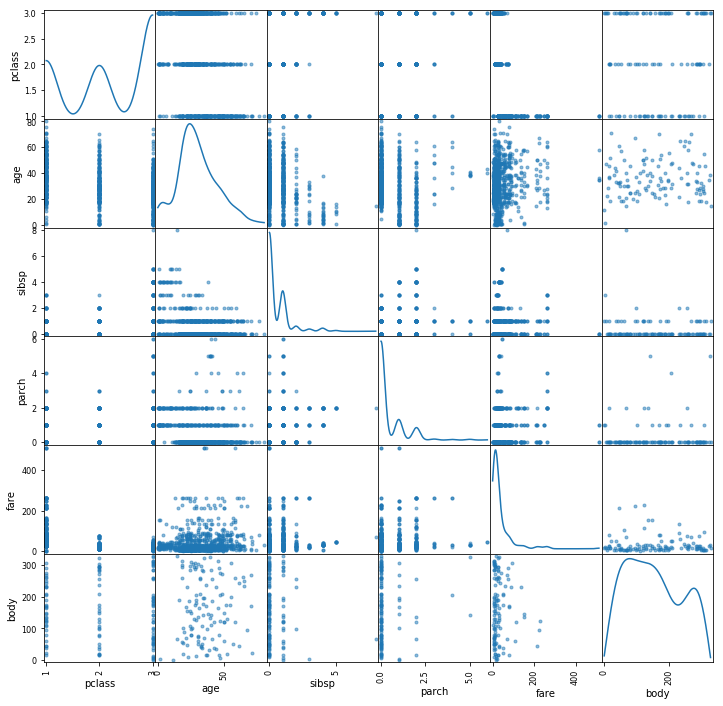

In [93]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(titanic[features], figsize = (12, 12), diagonal = 'kde');

#### Tipos de datos

In [94]:
print titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object


Según el enunciado, las variable **boat** y **body** no pueden usarse para el modelo. Tampoco podemos usar las variables pseudo-ID, como son **name**, **ticket**, **cabin**, **embarked** y **home.dest**

#### Función WoE para calcular el peso de la evidencia.

In [95]:
def get_WoE(data, var, target):
    crosstab = pd.crosstab(data[target], data[var])
    
    print "Obteniendo el Woe para la variable", var, ":"
    
    for col in crosstab.columns:
        if crosstab[col][1] == 0:
            print "  El WoE para", col, "[", sum(crosstab[col]), "] es infinito"
        elif crosstab[col][0] == 0:
            print "  El WoE para", col, "[", sum(crosstab[col]), "] es -infinito"
        else:
            print "  El WoE para", col, "[", sum(crosstab[col]), "] es",\
            np.log(float(crosstab[col][0]) / float(crosstab[col][1]))

#### Estudio de la variable pclass

In [96]:
print "Tabla de frecuencias para pclass:"
print pd.crosstab(titanic[target], titanic['pclass'])

Tabla de frecuencias para pclass:
pclass      1    2    3
survived               
0         103  146  369
1         181  115  131


In [97]:
get_WoE(titanic, 'pclass', target)

Obteniendo el Woe para la variable pclass :
  El WoE para 1 [ 284 ] es -0.563768043036
  El WoE para 2 [ 261 ] es 0.238674493345
  El WoE para 3 [ 500 ] es 1.03559932084


Variable categórica con tres niveles de densidad homogénea y pesos diferenciados. La dejamos como está. Habrá después que convertirla a dummy.

#### Estudio de la variable sex

In [98]:
print "Tabla de frecuencias para sex:"
print pd.crosstab(titanic[target], titanic['sex'])

Tabla de frecuencias para sex:
sex       female  male
survived              
0             96   522
1            292   135


In [99]:
get_WoE(titanic, 'sex', target)

Obteniendo el Woe para la variable sex :
  El WoE para female [ 388 ] es -1.1124056108
  El WoE para male [ 657 ] es 1.35239280944


Variable categórica con dos niveles de densidades homogéneas y pesos diferenciados. Habrá que convertirla a dummy.

#### Estudio de la variable age

([<matplotlib.axis.YTick at 0x1653fc18>,
 <a list of 21 Text yticklabel objects>)

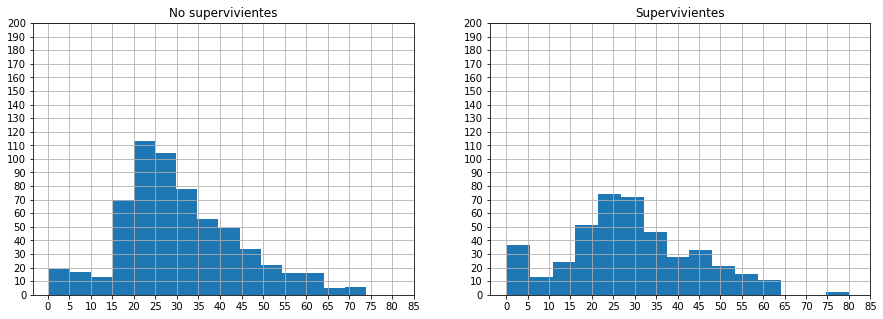

In [100]:
figure(figsize = (15,5))
subplot(121)
titanic[titanic['survived'] == 0]['age'].hist(bins = 15)
xticks(range(0,90,5))
yticks(range(0,210,10))
title('No supervivientes')
subplot(122)
titanic[titanic['survived'] == 1]['age'].hist(bins = 15)
title('Supervivientes')
xticks(range(0,90,5))
yticks(range(0,210,10))

Tenemos dos outliers en 76 y 80 años. Vamos a eliminarlos del modelo y vamos a hacer cuatro grupos de edades: de 0 a 15 años, de mayores de 15 a menores de 45, de 45 a 60 y mayores de 60

In [101]:
to_drop = titanic['age'] > 75
titanic.drop(titanic.index[to_drop], inplace = True)
titanic[titanic['age'] > 75]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In [102]:
titanic.loc[:, 'age_grp'] = None
for row in titanic.index:
    if (titanic.loc[row, 'age'] <= 15):
        titanic.loc[row, 'age_grp'] = 'Young'
    elif (titanic.loc[row, 'age'] > 15) and (titanic.loc[row, 'age'] < 45):
        titanic.loc[row, 'age_grp'] = 'Adult1'
    elif (titanic.loc[row, 'age'] >= 45) and (titanic.loc[row, 'age'] <= 60):
        titanic.loc[row, 'age_grp'] = 'Adult2'
    else:
        titanic.loc[row,'age_grp'] = 'Senior'

In [103]:
print "Tabla de frecuencias para age_grp:"
print pd.crosstab(titanic[target], titanic['age_grp'])

Tabla de frecuencias para age_grp:
age_grp   Adult1  Adult2  Senior  Young
survived                               
0            470      75      24     49
1            285      68       6     66


In [104]:
get_WoE(titanic, 'age_grp', target)

Obteniendo el Woe para la variable age_grp :
  El WoE para Adult1 [ 755 ] es 0.500243514435
  El WoE para Adult2 [ 143 ] es 0.0979804083602
  El WoE para Senior [ 30 ] es 1.38629436112
  El WoE para Young [ 115 ] es -0.297834443916


Esta nueva variable categórica habrá que convertirla a dummy.

#### Estudio de la variable sibsp (número de hermanos/cónyuges a bordo)

In [105]:
print "Tabla de frecuencias para sibsp:"
print pd.crosstab(titanic[target], titanic['sibsp'])

Tabla de frecuencias para sibsp:
sibsp       0    1   2   3   4  5  8
survived                            
0         429  133  20  10  19  6  1
1         254  146  16   6   3  0  0


In [106]:
 get_WoE(titanic, 'sibsp', target)

Obteniendo el Woe para la variable sibsp :
  El WoE para 0 [ 683 ] es 0.524122651909
  El WoE para 1 [ 279 ] es -0.0932574934866
  El WoE para 2 [ 36 ] es 0.223143551314
  El WoE para 3 [ 16 ] es 0.510825623766
  El WoE para 4 [ 22 ] es 1.8458266905
  El WoE para 5 [ 6 ] es infinito
  El WoE para 8 [ 1 ] es infinito


Agrupamos 5 y 8 con 4.

In [107]:
titanic.loc[:, 'sibsp_grp'] = None
for row in titanic.index:
    if titanic.loc[row, 'sibsp'] in (0,1,2,3):
        titanic.loc[row,'sibsp_grp'] = str(titanic.loc[row, 'sibsp'])
    else:
        titanic.loc[row, 'sibsp_grp'] = '4+'

In [108]:
print "Tabla de frecuencias para sibsp_grp:"
print pd.crosstab(titanic[target], titanic['sibsp_grp'])

Tabla de frecuencias para sibsp_grp:
sibsp_grp    0    1   2   3  4+
survived                       
0          429  133  20  10  26
1          254  146  16   6   3


In [109]:
get_WoE(titanic, 'sibsp_grp', target)

Obteniendo el Woe para la variable sibsp_grp :
  El WoE para 0 [ 683 ] es 0.524122651909
  El WoE para 1 [ 279 ] es -0.0932574934866
  El WoE para 2 [ 36 ] es 0.223143551314
  El WoE para 3 [ 16 ] es 0.510825623766
  El WoE para 4+ [ 29 ] es 2.15948424935


Esta nueva variable categórica habrá que convertirla a dummy.

#### Estudio de la variable parch (número de padres/hijos a bordo)

In [110]:
print "Tabla de frecuencias para parch:"
print pd.crosstab(titanic[target], titanic['parch'])

Tabla de frecuencias para parch:
parch       0   1   2  3  4  5  6
survived                         
0         497  65  42  3  4  5  2
1         268  95  55  5  1  1  0


In [111]:
get_WoE(titanic, 'parch', target)

Obteniendo el Woe para la variable parch :
  El WoE para 0 [ 765 ] es 0.617603045586
  El WoE para 1 [ 160 ] es -0.379489621705
  El WoE para 2 [ 97 ] es -0.269663566949
  El WoE para 3 [ 8 ] es -0.510825623766
  El WoE para 4 [ 5 ] es 1.38629436112
  El WoE para 5 [ 6 ] es 1.60943791243
  El WoE para 6 [ 2 ] es infinito


Agrupamos 4,5 y 6

In [112]:
titanic.loc[:, 'parch_grp'] = None
for row in titanic.index:
    if titanic.loc[row, 'parch'] in (0,1,2,3):
        titanic.loc[row,'parch_grp'] = str(titanic.loc[row, 'parch'])
    else:
        titanic.loc[row, 'parch_grp'] = '4+'

In [113]:
print "Tabla de frecuencias para parch_grp:"
print pd.crosstab(titanic[target], titanic['parch_grp'])

Tabla de frecuencias para parch_grp:
parch_grp    0   1   2  3  4+
survived                     
0          497  65  42  3  11
1          268  95  55  5   2


In [114]:
get_WoE(titanic, 'parch_grp', target)

Obteniendo el Woe para la variable parch_grp :
  El WoE para 0 [ 765 ] es 0.617603045586
  El WoE para 1 [ 160 ] es -0.379489621705
  El WoE para 2 [ 97 ] es -0.269663566949
  El WoE para 3 [ 8 ] es -0.510825623766
  El WoE para 4+ [ 13 ] es 1.70474809224


Esta nueva variable categórica habrá que convertirla a dummy.

#### Estudio de la variable fare.

([<matplotlib.axis.YTick at 0x15edf278>,
 <a list of 6 Text yticklabel objects>)

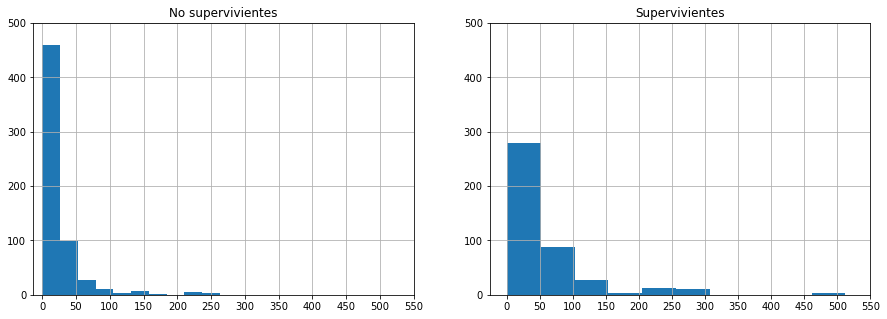

In [115]:
figure(figsize = (15,5))
subplot(121)
titanic[titanic['survived'] == 0]['fare'].hist()
title('No supervivientes')
xticks(range(0,600,50))
yticks(range(0,600,100))
subplot(122)
titanic[titanic['survived'] == 1]['fare'].hist()
title('Supervivientes')
xticks(range(0,600,50))
yticks(range(0,600,100))

Vamos a hacer dos grupos. Con precio del billete hasta 100 y por encima de 100.

In [116]:
titanic.loc[:, 'fare_grp'] = None
for row in titanic.index:
    if titanic.loc[row, 'fare'] <= 50:
        titanic.loc[row,'fare_grp'] = 'p0'
    else:
        titanic.loc[row, 'fare_grp'] = 'p1'

In [117]:
print "Tabla de frecuencias para fare_grp:"
print pd.crosstab(titanic[target], titanic['fare_grp'])

Tabla de frecuencias para fare_grp:
fare_grp   p0   p1
survived          
0         551   67
1         280  145


In [118]:
get_WoE(titanic, 'fare_grp', target)

Obteniendo el Woe para la variable fare_grp :
  El WoE para p0 [ 831 ] es 0.676945205984
  El WoE para p1 [ 212 ] es -0.77204112303


#### CONCLUSIÓN: las variables a usar en el modelo serán: pclass, sex, age_grp, sibsp_grp, parch_grp y fare_group.

### Eliminación de variables identificadoras y actualización con las nuevas variables

In [119]:
to_remove = ['name', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'boat', 'body', 'home.dest', 'embarked']
to_add = ['age_grp', 'sibsp_grp', 'parch_grp', 'fare_group']

for col in to_remove:
    features.remove(col)

for col in to_add:
    features.append(col)

features

['pclass', 'sex', 'age_grp', 'sibsp_grp', 'parch_grp', 'fare_group']

### Probamos el modelo

In [120]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

def metricas_modelos(y_true, y_pred):
    from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

    # Obtención de matriz de confusión
    confusion_matrix = confusion_matrix(y_true, y_pred)

    print "La matriz de confusión es "
    print confusion_matrix

    print 'Precisión:', accuracy_score(y_true, y_pred)
    print 'Exactitud:', precision_score(y_true, y_pred)
    print 'Exhaustividad:', recall_score(y_true, y_pred)
    print 'F1:', f1_score(y_true, y_pred)

    false_positive_rate, recall, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(false_positive_rate, recall)

    print 'AUC:', auc(false_positive_rate, recall)

    plot(false_positive_rate, recall, 'b')
    plot([0, 1], [0, 1], 'r--')
    title('AUC = %0.2f' % roc_auc)

In [121]:
from sklearn.cross_validation import train_test_split

target_data = titanic['survived']
data_model = concatenate((pd.get_dummies(titanic['pclass']),
                          pd.get_dummies(titanic['sex']),
                          pd.get_dummies(titanic['age_grp']),
                          pd.get_dummies(titanic['sibsp_grp']),
                          pd.get_dummies(titanic['parch_grp']),
                          pd.get_dummies(titanic['fare_grp'])), axis = 1)

x_train, x_test, y_train, y_test = train_test_split(data_model, target_data)

#### Entrenamos el modelo

La matriz de confusión es 
[[412  60]
 [ 97 213]]
Precisión: 0.799232736573
Exactitud: 0.78021978022
Exhaustividad: 0.687096774194
F1: 0.730703259005
AUC: 0.779989065063


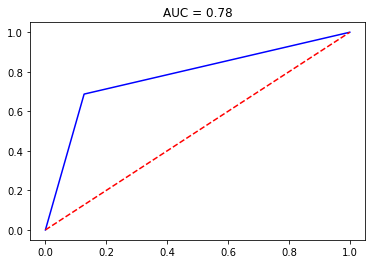

In [122]:
from sklearn.linear_model.logistic import LogisticRegression

model = LogisticRegression().fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

metricas_modelos(y_train, y_pred_train)

#### Lo validamos

La matriz de confusión es 
[[130  16]
 [ 39  76]]
Precisión: 0.789272030651
Exactitud: 0.826086956522
Exhaustividad: 0.660869565217
F1: 0.734299516908
AUC: 0.775640262061


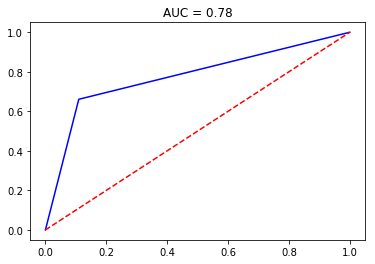

In [123]:
metricas_modelos(y_test, y_pred_test)

## SEGMENTACIÓN DE DATOS DE REDES SOCIALES

En el archivo “snsdata.csv” se encuentra los términos más utilizados en unos 30.000 perﬁles aleatorios de adolescentes de una red social. Importar el archivo y separar el conjunto de datos en dos según el género de los usuarios (F y M). En cada uno de los subconjuntos de datos eliminar el año de graduación ('gradyear'), el género ('gender') y la edad (‘age’).  Utilizando el algoritmo de k- means identiﬁcar el número de segmentos óptimos en los que se divide cada subconjunto de datos y obtener los valores de los centroides.

### Cargamos los datos

In [124]:
datos = pd.read_csv("snsdata.csv")
datos.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


### Separamos por género y eliminamos las columnas 'gradyear', 'gender' y 'age'

In [125]:
to_remove = ['gradyear','gender','age']
masculino = datos[datos['gender'] == 'M'].copy()
masculino.drop(to_remove, axis = 1, inplace = True)
femenino = datos[datos['gender'] == 'F'].copy()
femenino.drop(to_remove, axis = 1, inplace = True)

### Obtención del número óptimo de clases con k-means

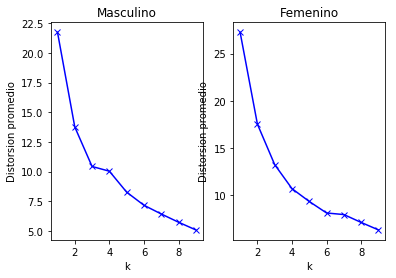

In [126]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
def plot_distorsion(x, figure_name, max_k = 10, n_init = 10):
    meandistortions = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        meandistortions.append(sum(np.min(cdist(x, kmeans.cluster_centers_,
                                                'euclidean'), axis = 1))
                               / x.shape[0])

    plot(range(1, max_k), meandistortions, 'bx-')
    xlabel('k')
    ylabel('Distorsion promedio')
    title(figure_name)

subplot(1, 2, 1)
plot_distorsion(masculino, 'Masculino')
subplot(1, 2, 2)
plot_distorsion(femenino, 'Femenino')

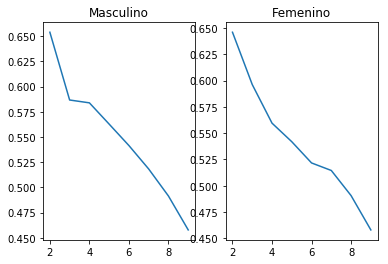

In [127]:
from sklearn.metrics import silhouette_score

def plot_sillhouette(x, figure_name, max_k = 10, n_init = 10):
    sillhouette_avgs = []
    
    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(x)
        sillhouette_avgs.append(silhouette_score(x, kmean.labels_))
        
    plot(range(2, max_k), sillhouette_avgs)
    title(figure_name)

subplot(1, 2, 1)
plot_sillhouette(masculino, 'Masculino')
subplot(1, 2, 2)
plot_sillhouette(femenino, 'Femenino')

El número óptimo de segmentos es aquel donde se produce una caída más rápida de la dispersión y a partir de ese punto, no mejora ostensiblemente. También se puede calcular como el valor para el cual el coeficiente de Sillhouette es mayor.

### Posición de los centroides con el número óptimo de segmentos (k = 2)

In [128]:
kmeans_2 = KMeans(n_clusters = 2).fit(femenino)
kmeans_2.cluster_centers_

array([[  8.98806342e+01,   3.37259343e-01,   2.72480181e-01,
          2.73839185e-01,   2.82899207e-01,   2.14949037e-01,
          1.73952435e-01,   1.83465459e-01,   9.51302378e-02,
          7.85956965e-02,   1.47678369e-01,   4.72480181e-01,
          2.05436014e-01,   1.81653454e-01,   1.81426954e-01,
          1.23442809e-01,   5.61721404e-01,   2.95130238e-01,
          4.23556059e-02,   7.91392978e-01,   2.68176670e-01,
          5.91619479e-01,   3.54246886e-01,   1.45186863e-01,
          2.40090600e-02,   5.29558324e-01,   1.51755379e-01,
          1.33635334e-01,   3.67157418e-01,   5.32729332e-01,
          1.87542469e-01,   1.13476784e-01,   9.15062288e-02,
          1.84371461e-01,   1.32049830e-01,   9.58097395e-02,
          5.97961495e-02],
       [  1.74154997e+01,   2.50184251e-01,   2.05340439e-01,
          2.20760814e-01,   1.86745280e-01,   1.63728103e-01,
          1.45529792e-01,   1.19167753e-01,   6.49129769e-02,
          8.59459153e-02,   1.30166109e-01,

In [129]:
kmeans_2 = KMeans(n_clusters = 2).fit(masculino)
kmeans_2.cluster_centers_

array([[  1.36336727e+01,   2.99313284e-01,   4.47075539e-01,
          1.99857921e-01,   7.10395453e-03,   3.17309969e-02,
          7.88538953e-02,   8.05114847e-03,   2.51006394e-01,
          9.11674165e-02,   2.01989107e-01,   6.74875681e-02,
          1.57944589e-01,   7.74331044e-02,   4.90172863e-02,
          5.37532560e-02,   1.89912385e-01,   3.28676296e-01,
          4.30973242e-02,   6.62088563e-01,   2.37035283e-01,
          4.12739758e-01,   1.81150841e-01,   1.17215250e-01,
          2.60478333e-02,   1.72862894e-01,   2.86526166e-02,
          2.39166469e-02,   1.21951220e-01,   4.42813166e-02,
          6.93819560e-02,   3.00734075e-02,   2.10750651e-02,
          1.68126924e-01,   1.01349751e-01,   6.74875681e-02,
          5.32796590e-02],
       [  7.26636637e+01,   3.83383383e-01,   4.54454454e-01,
          2.53253253e-01,   1.80180180e-02,   4.70470470e-02,
          8.40840841e-02,   1.10110110e-02,   3.58358358e-01,
          1.54154154e-01,   1.90190190e-01,

## COMPONENTES PRINCIPALES

En el archivo “concrete.csv” se encuentra los datos de diferentes mezclas de hormigón. Utilizar el análisis de componentes principales y obtener el número de componentes principales con los que se puede explicar el 50%, 75% y 90% de la varianza. Obtener el porcentaje de la varianza que explica la primera componente principal.

### Cargamos dataset

In [130]:
hormigon_df = pd.read_csv("concrete.csv")

Vemos cómo es nuestro dataframe.

In [131]:
hormigon_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [132]:
hormigon_df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [133]:
hormigon_df.shape

(1030, 9)

### Guardamos los valores como numpy array

In [134]:
hormigon_data = hormigon_df.as_matrix()

### Calculamos el número de componetes que explican el 50, 70 y 90 % de la varianza

In [135]:
from sklearn.decomposition import PCA

pca = PCA(n_components = None)
hormigon_pca = pca.fit_transform(hormigon_data)
componentes = []
varianzas_target = ['50%','75%','90%']
varianzas = []
for i in range(shape(hormigon_pca)[1]):
    var_exp = pca.explained_variance_ratio_[range(i + 1)].sum()
    if len(componentes) == 0:
        if (var_exp >= 0.5) and (var_exp < 0.75):
            componentes.append(i+1)
            varianzas.append(var_exp)
    elif len(componentes) == 1:
        if (var_exp >= 0.75) and (var_exp < 0.9):
            componentes.append(i+1)
            varianzas.append(var_exp)
    elif len(componentes) == 2:
        if (var_exp >= 0.9):
            componentes.append(i+1)
            varianzas.append(var_exp)

for j in range(len(componentes)):
    print varianzas_target[j], "de la varianza explicada con", componentes[j], "componentes:", varianzas[j]

50% de la varianza explicada con 2 componentes: 0.572433128251
75% de la varianza explicada con 3 componentes: 0.756005146663
90% de la varianza explicada con 5 componentes: 0.963442482825


### Porcentaje de la varianza que explica la primera componente principal.

In [136]:
pca = PCA(n_components = 1)
hormigon_pca = pca.fit_transform(hormigon_data)

print "Varianza explicada con la primera componente principal", pca.explained_variance_ratio_[range(1)].sum()

Varianza explicada con la primera componente principal 0.324912981545
